# Problem: Locating a Defined Area in the Star Map
_There are 3 images provided. The big one is a Star Map, small ones are cropped images from the Star Map. One of the small one is horizontally and vertically matching with the Star Map, another one is rotated. The task is developing a C++ program or a python script that takes 2 images as an input:_<br>
1. One of the small images<br>
2. The Star Map

In [1]:
import cv2
import numpy as np
from PIL import Image

In [2]:
smaller_name = input("Please enter the name of the smaller image : ") or "Small_area.png"
bigger_name = input("Please enter the name of the bigger image  : ") or "StarMap.png"

Please enter the name of the smaller image : Small_area.png
Please enter the name of the bigger image  : StarMap.png


In [3]:
smaller_img = cv2.imread(smaller_name)
big_picture = cv2.imread(bigger_name, 
                         cv2.IMREAD_IGNORE_ORIENTATION | cv2.IMREAD_COLOR)
# If the bigger pictures come from a mobile device,
# EXIF information is reset to avoid unintentional rotations.

smaller_img_gray = cv2.imread(smaller_name, 0)
big_picture_gray = cv2.imread(bigger_name, 0)

HEIGHT, WIDTH = smaller_img_gray.shape

In [4]:
# result matrix of squared differences:
result = cv2.matchTemplate(image=big_picture_gray, 
                           templ=smaller_img_gray, 
                           method=cv2.TM_SQDIFF)

# minimum & maximum values/points of the result matrix:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

print("Minimum Squared Difference of the template found :", min_val)
print("Coordinates of top left corner of the template   :", min_loc)

(startX, startY) = min_loc    # top left corner
(endX, endY) = (startX + WIDTH, startY + HEIGHT)    # bottom right corner

Minimum Squared Difference of the template found : 0.0
Coordinates of top left corner of the template   : (855, 150)


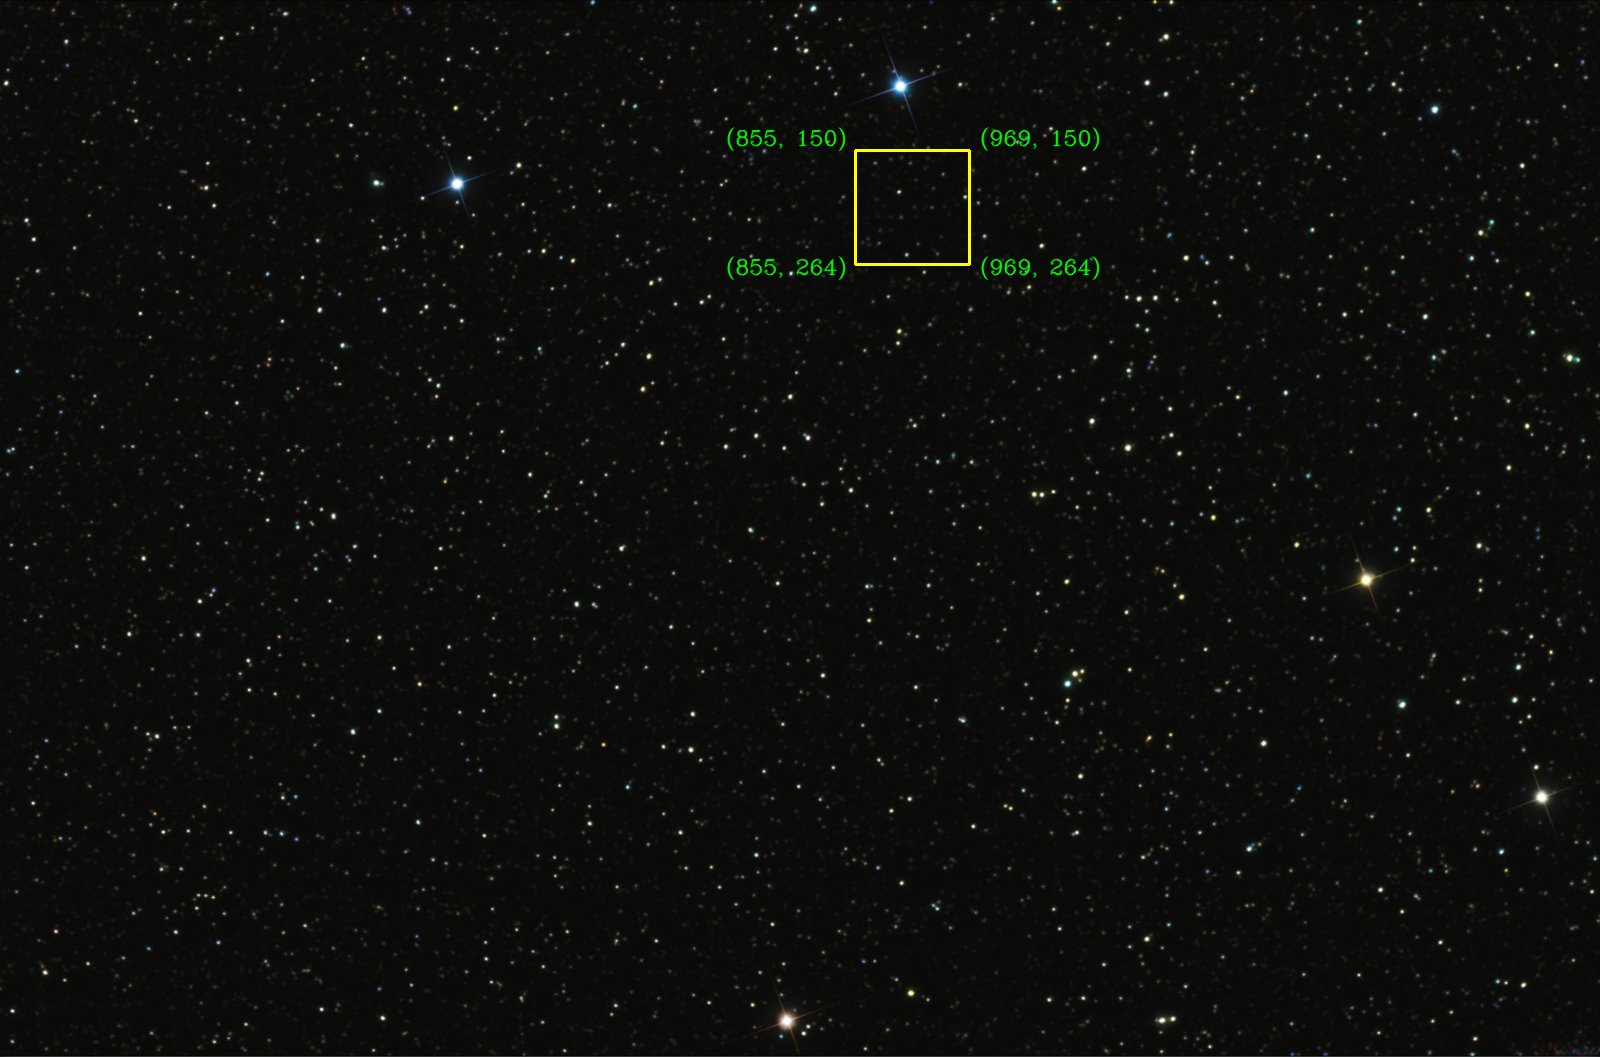

In [5]:
def mark_the_bigPicture(modified_image_name="StarMapMarked.png"):
    """This function creates a rectangle over the template found in the 
    bigger picture and shows the coordinates of the corner points.
    The only variable it takes is the modified image name as a string."""
    # yellow rectangle
    cv2.rectangle(img=big_picture, 
                  pt1=(startX, startY), 
                  pt2=(endX, endY), 
                  color=(0, 255, 255), 
                  thickness=2)

    # TEXT & ORIGIN of top left/right and bottom left/right points
    text_TL = f"({startX}, {startY})"
    text_TR = f"({startX + WIDTH}, {startY})"
    text_BL = f"({startX}, {startY + HEIGHT})"
    text_BR = f"({startX + WIDTH}, {startY + HEIGHT})"
    org_TL = (startX-130, startY-5)
    org_TR = (startX+WIDTH+10, startY-5)
    org_BL = (startX-130, startY+HEIGHT+10)
    org_BR = (startX+WIDTH+10, startY+HEIGHT+10)

    for TEXT, ORIGIN in zip((text_TL, text_TR, text_BL, text_BR), 
                            (org_TL, org_TR, org_BL, org_BR)):
        # texts for the corner points in (X,Y) format
        cv2.putText(img=big_picture, 
                    text=TEXT, 
                    org=ORIGIN, 
                    fontFace=cv2.FONT_HERSHEY_COMPLEX, 
                    lineType=cv2.LINE_AA,
                    fontScale=0.7, 
                    color=(0,255,0), 
                    thickness=1)
    cv2.imwrite(modified_image_name, big_picture)
    return modified_image_name

marked_bigPicture = mark_the_bigPicture()

Image.open(marked_bigPicture)

In [6]:
# to display it in a window
marked_bigPicture = cv2.imread(marked_bigPicture)
cv2.namedWindow("StarMap_window", cv2.WINDOW_NORMAL)
cv2.imshow("StarMap_window", marked_bigPicture)
cv2.waitKey(0)
cv2.destroyWindow("StarMap_window")

---
## Struggling with the Rotated Image

The basic steps to get a decent value of minimum squared difference:<br>
* Take the copy of the smaller image<br>
* Rotate it to a certain angle<br>
* Crop to image to avoid black areas created due to rotation<br>
* Get the result matrix and check the SQDIFF value<br>
* Print the minimum value with the coordinate of the template<br>

**Proof Cell - The known image: 'Small_area.png'**

In [6]:
import time
from scipy.ndimage import rotate as sci_rotate

In [7]:
start_time = time.time()
smaller_img_gray = cv2.imread("Small_area.png", 0)
big_picture_gray = cv2.imread("StarMap.png", 0)

ROTATE = smaller_img_gray.copy()
for angle in np.arange(-45,46, 0.5):
    rotated = sci_rotate(ROTATE, angle=angle)
    rotated = rotated[20:-20, 20:-20]
    result = cv2.matchTemplate(big_picture_gray, rotated, cv2.TM_SQDIFF)
    if cv2.minMaxLoc(result)[0] < 50000:
        print(f"-----Flip Code: {None}-----\nmin_value ({angle:.1f} deg):",
              cv2.minMaxLoc(result)[0], 
              "\nCoordinates:", cv2.minMaxLoc(result)[2])
            
end_time = time.time()
print("\nDone! The cell took {} seconds to complete."\
      .format(int(end_time - start_time)))

-----Flip Code: None-----
min_value (-1.0 deg): 43277.0 
Coordinates: (874, 169)
-----Flip Code: None-----
min_value (0.0 deg): 0.0 
Coordinates: (875, 170)
-----Flip Code: None-----
min_value (1.0 deg): 42607.0 
Coordinates: (874, 169)

Done! The cell took 11 seconds to complete.


**Rotated Image - "Small_area_rotated.png"**

In [8]:
start_time = time.time()

smaller_img_gray = cv2.imread("Small_area_rotated.png", 0)
big_picture_gray = cv2.imread("StarMap.png", 0)

ROTATE = smaller_img_gray.copy()
for angle in np.arange(-45,46, 0.50):
    if abs(angle) >= 0 and abs(angle) <= 15:
        CUT = 30
        rotated = sci_rotate(ROTATE, angle=angle)
        rotated = rotated[CUT:-1*CUT, CUT:-1*CUT]
        result = cv2.matchTemplate(big_picture_gray, rotated, cv2.TM_SQDIFF)
        if cv2.minMaxLoc(result)[0] < 150000:
            print(f"-----Flip Code: {None}-----\nmin_value ({angle:.1f} deg):",
              cv2.minMaxLoc(result)[0], 
              "\nCoordinates:", cv2.minMaxLoc(result)[2])
            
    elif abs(angle) > 15 and abs(angle) <= 30:
        CUT = 45
        rotated = sci_rotate(ROTATE, angle=angle)
        rotated = rotated[CUT:-1*CUT, CUT:-1*CUT]
        result = cv2.matchTemplate(big_picture_gray, rotated, cv2.TM_SQDIFF)
        if cv2.minMaxLoc(result)[0] < 150000:
            print(f"-----Flip Code: {None}-----\nmin_value ({angle:.1f} deg):",
              cv2.minMaxLoc(result)[0], 
              "\nCoordinates:", cv2.minMaxLoc(result)[2])
            
    elif abs(angle) > 30:
        CUT = 50
        rotated = sci_rotate(ROTATE, angle=angle)
        rotated = rotated[CUT:-1*CUT, CUT:-1*CUT]
        result = cv2.matchTemplate(big_picture_gray, rotated, cv2.TM_SQDIFF)
        if cv2.minMaxLoc(result)[0] < 150000:
            print(f"-----Flip Code: {None}-----\nmin_value ({angle:.1f} deg):",
              cv2.minMaxLoc(result)[0], 
              "\nCoordinates:", cv2.minMaxLoc(result)[2])
                   
end_time = time.time()
print("\nDone! The cell took {} seconds to complete."\
      .format(int(end_time - start_time)))

-----Flip Code: None-----
min_value (30.5 deg): 122729.5 
Coordinates: (471, 611)

Done! The cell took 12 seconds to complete.


Even though we get a quite high value of SQ Difference, we roughly can estimate the location of the rotated image.

In [9]:
CUT = 50
DEGREE = 30.5

smaller_img_gray = sci_rotate(smaller_img_gray, angle=DEGREE)
smaller_img_gray = smaller_img_gray[CUT:-1*CUT, CUT:-1*CUT]

HEIGHT, WIDTH = smaller_img_gray.shape

# result matrix of squared differences:
result = cv2.matchTemplate(image=big_picture_gray, 
                           templ=smaller_img_gray, 
                           method=cv2.TM_SQDIFF)

# minimum & maximum values/points of the result matrix:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

print("Minimum Squared Difference of the template found :", min_val)
print("Coordinates of top left corner of the template   :", min_loc)

(startX, startY) = min_loc    # top left corner
(endX, endY) = (startX + WIDTH, startY + HEIGHT)    # bottom right corner

Minimum Squared Difference of the template found : 122729.5
Coordinates of top left corner of the template   : (471, 611)


In [10]:
### Here is the "cheated" part: ###
# First, we find the origin of the img.
origin_X = (startX + endX) // 2
origin_Y = (startY + endY) // 2

# Nice! Then we pull the original one and get its shape.
smaller_img_gray = cv2.imread("Small_area_rotated.png", 0)
HEIGHT, WIDTH = smaller_img_gray.shape

# We know the origin, we know the shape. So...
startX = origin_X - (WIDTH//2)
startY = origin_Y - (HEIGHT//2)

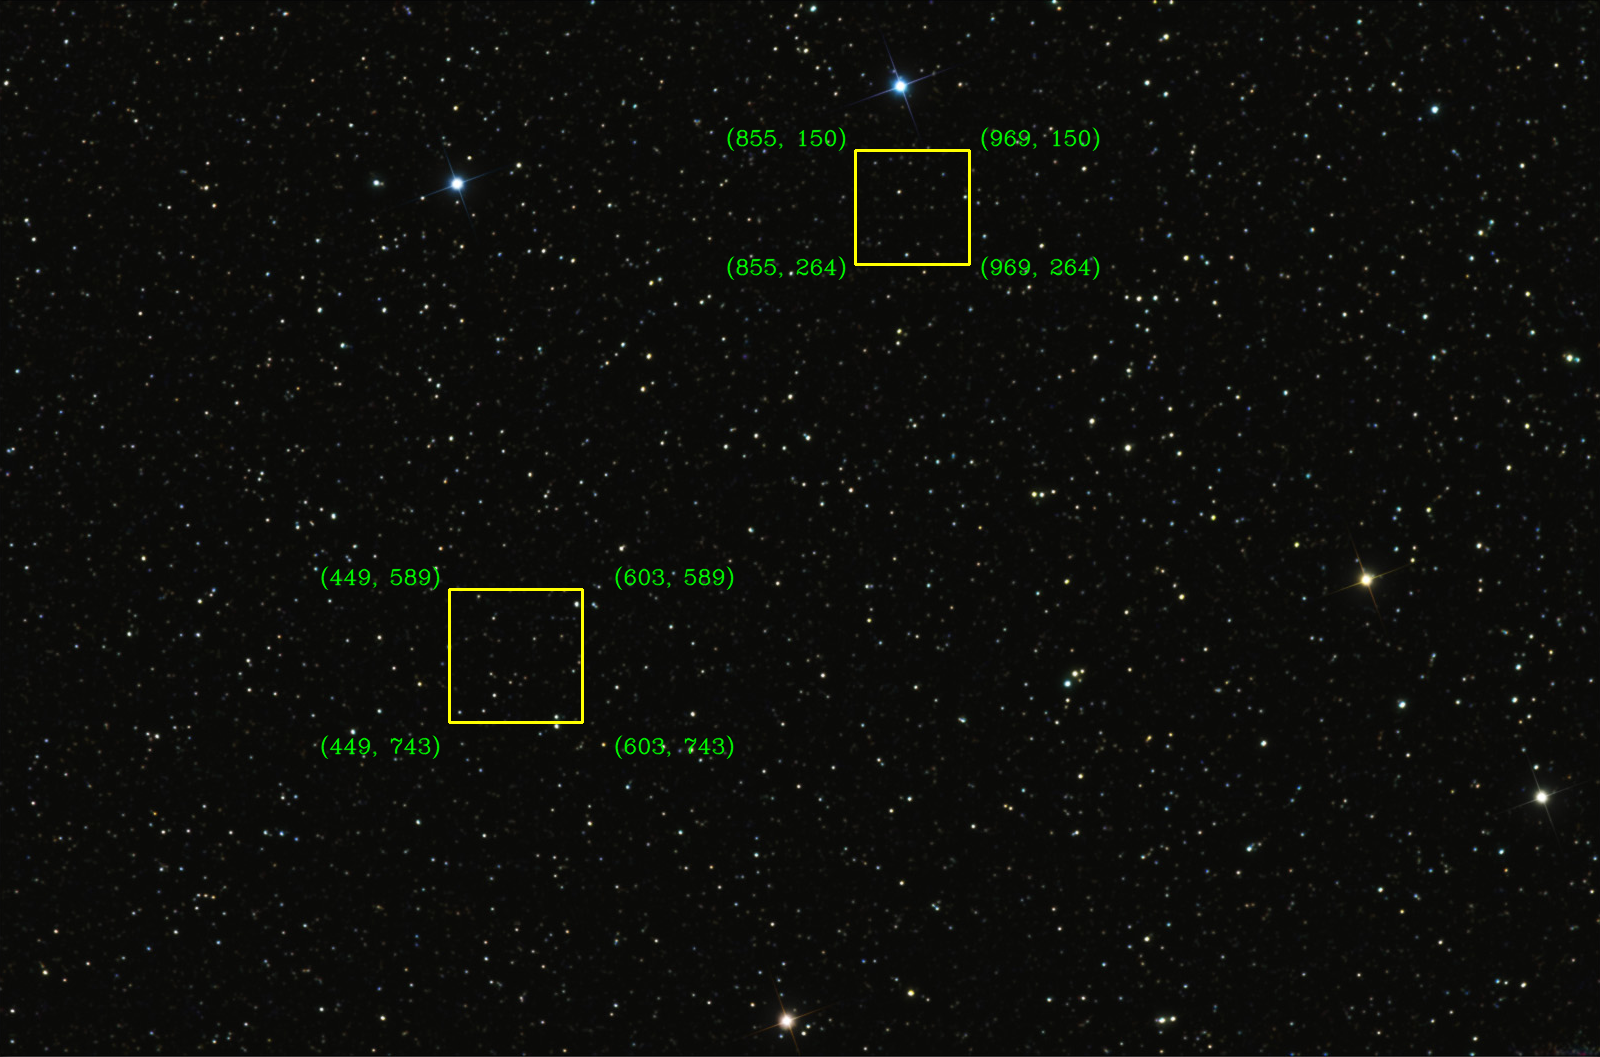

In [11]:
Image.open(mark_the_bigPicture())

**Comments:** Of course the implementation above didn't provide us the exact points of the corner points even though we know that it was rotated 30.5 degree. It shouldn't even be a rectangle but a some kind of rhombus. It's obvious that the <code>matchTemplate()</code> function is not capable enough to handle rotated images. Since I don't have enough experience with other feature matching methods of OpenCV module, the second part of the problem remains _partially_ solved at the moment.<br>

_...To be continued..._